#### Some Important libraries

* !pip install gym
* !pip install Box2D
* !pip install pygame

In [13]:
import gym
import pandas as pd

In [14]:
import gym
# Create the environment and render the env to the screen
env = gym.make("LunarLander-v2", render_mode="human")
#Actions space 
env.action_space.seed(42)
#observation space
observation, info = env.reset(seed=42)

data=[]
# Run the environment for 1000 timesteps
for i in range(1000):
#taking a step in the environment
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    data.append([observation,reward,terminated,truncated])
  # If the environment has entered a terminal state, reset it
    if terminated or truncated:
        observation, info = env.reset()
#Close the Environment
env.close()


In [15]:
df = pd.DataFrame(data,columns=['observation','reward','terminated','truncated'])

In [16]:
df['reward'].describe()

count    1000.000000
mean       -2.338304
std        11.105863
min      -100.000000
25%        -2.526453
50%        -1.448880
75%        -0.196379
max       113.706671
Name: reward, dtype: float64

In [17]:
df = pd.DataFrame(data,columns=['observation','reward','terminated','truncated'])

### Dataframe for 1000 timesteps

In [18]:
df

,observation,reward,terminated,truncated
0,"[0.0045939446, 1.424763, 0.23233262, 0.2947628...",1.144980,False,False
1,"[0.006974888, 1.4308035, 0.2428536, 0.26844853...",0.225970,False,False
2,"[0.009311581, 1.4375646, 0.23868391, 0.3004459...",-3.645544,False,False
3,"[0.011585331, 1.4437385, 0.2307829, 0.2743505,...",1.534388,False,False
4,"[0.013768482, 1.4493215, 0.21942608, 0.2481250...",2.028554,False,False
...,...,...,...,...
995,"[-0.11999693, 0.82839507, -0.59173566, -0.7096...",-3.333364,False,False
996,"[-0.12609987, 0.81273264, -0.6290123, -0.70690...",-3.509181,False,False
997,"[-0.13227025, 0.7963892, -0.6372193, -0.738624...",-4.134976,False,False
998,"[-0.13839856, 0.7795179, -0.6311633, -0.761580...",-2.342367,False,False


In [19]:
df.describe()

,reward
count,1000.000000
mean,-2.338304
std,11.105863
min,-100.000000
25%,-2.526453
50%,-1.448880
75%,-0.196379
max,113.706671


### Timesteps which resulted in termination

In [20]:
df[df['terminated'] == True]

,observation,reward,terminated,truncated
122,"[0.6741131, -0.14698955, 1.5591494, -0.0258534...",-100.0,True,False
213,"[0.33096856, -0.11887117, 0.81619185, -1.01752...",-100.0,True,False
281,"[-0.5595145, 0.053320106, -1.4575338, -0.60312...",-100.0,True,False
381,"[0.67087936, 0.11506391, -0.31393474, -0.29407...",-100.0,True,False
483,"[-0.9081073, 0.023206912, -1.1338278, -0.82372...",-100.0,True,False
579,"[0.9603367, 0.013146267, 1.7754453, -0.1623157...",-100.0,True,False
664,"[0.19320507, -0.0066842344, 0.20131913, -0.321...",-100.0,True,False
745,"[-0.006736183, 0.016088758, 0.6856531, 0.08419...",-100.0,True,False
848,"[0.27103195, -0.075497806, 0.97763765, -0.2183...",-100.0,True,False
936,"[1.0012058, 0.8628556, 2.058451, -1.1792816, -...",-100.0,True,False


In [21]:
df['observation'][936]

array([ 1.0012058,  0.8628556,  2.058451 , -1.1792816, -1.7168295,
       -0.2947206,  0.       ,  0.       ], dtype=float32)

### Graph for Reward

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='reward', ylabel='Count'>

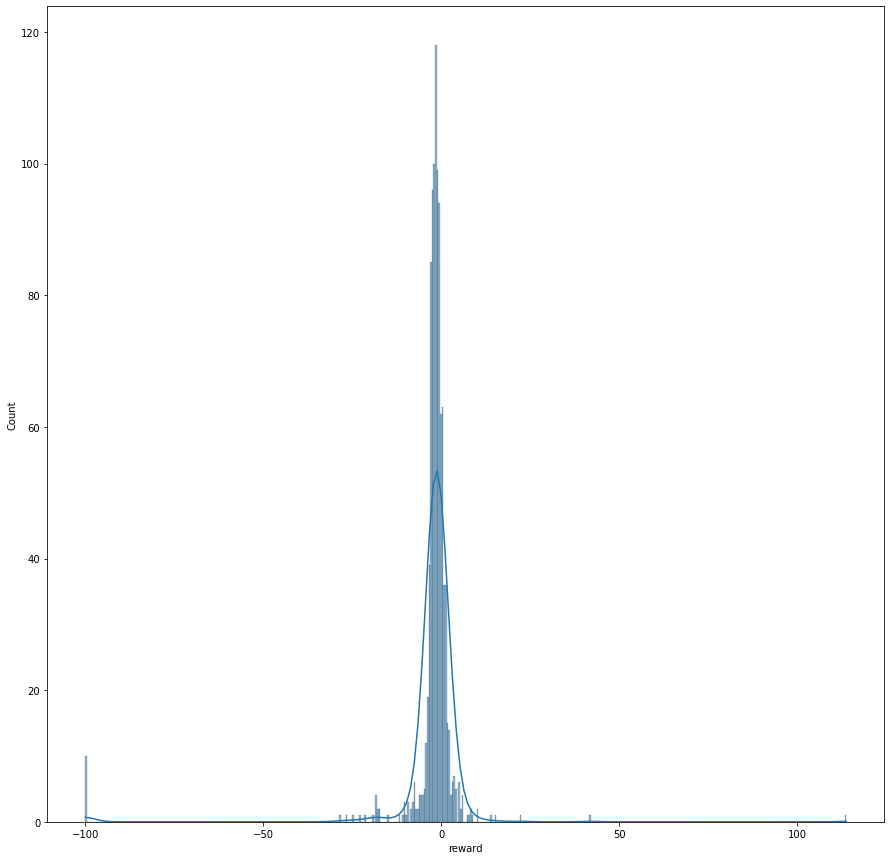

In [23]:
plt.figure(figsize=(15,15))
sns.histplot(df['reward'],kde=True)